### Lushan Map
Code to produce Area around the Lushan Earthquake and corresponding gravity stations

In [1]:
# imports
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import xarray as xr

import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [2]:
# df with relative gravity station coordinates

df = pd.read_csv('gravitystations.txt', sep='\t')

In [3]:
# update df to only include points within desired latitude and longitude

lat_min = 26.0
lat_max = 32.0
lon_min = 100.0
lon_max = 105.0

df['lat'] = df['lat'].astype(float)
df['long'] = df['long'].astype(float)

df = df[(df['lat'] >= lat_min) & (df['lat'] <= lat_max) &
                 (df['long'] >= lon_min) & (df['long'] <= lon_max)]

In [4]:
# df with absolute gravity station locations and earthquake center
stations_df = pd.read_csv('absgravitystations.txt', sep=' ')

In [7]:
ds = xr.open_dataset("ETOPO_2022_v1_60s_N90W180_bed.nc")
ds = ds.sel(lon=slice(100, 105), lat=slice(26, 32))

In [6]:
ds

<xarray.Dataset>
Dimensions:  (lat: 360, lon: 300)
Coordinates:
  * lat      (lat) float64 26.01 26.02 26.04 26.06 ... 31.94 31.96 31.97 31.99
  * lon      (lon) float64 100.0 100.0 100.0 100.1 ... 104.9 105.0 105.0 105.0
Data variables:
    crs      |S1 ...
    z        (lat, lon) float32 ...
Attributes:
    GDAL_AREA_OR_POINT:             Area
    node_offset:                    1
    GDAL_TIFFTAG_COPYRIGHT:         DOC/NOAA/NESDIS/NCEI > National Centers f...
    GDAL_TIFFTAG_DATETIME:          20220929123913.0
    GDAL_TIFFTAG_IMAGEDESCRIPTION:  Topography-Bathymetry; EGM2008 height
    Conventions:                    CF-1.5
    GDAL:                           GDAL 3.3.2, released 2021/09/01
    NCO:                            netCDF Operators version 4.9.1 (Homepage ...

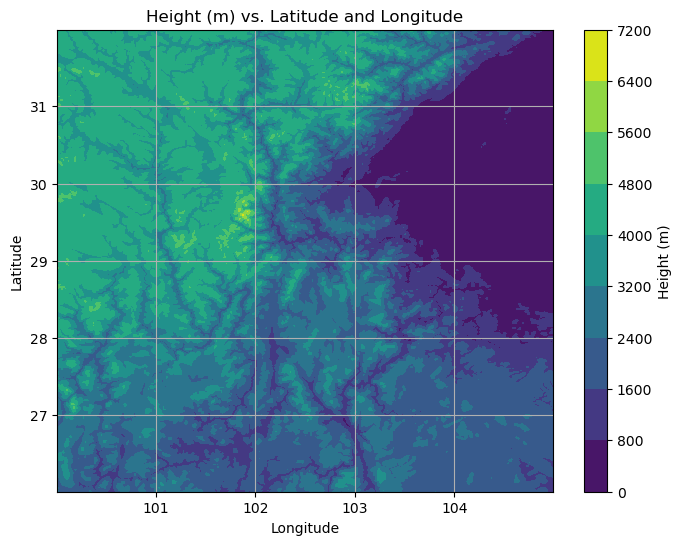

In [8]:
# Extract latitude and longitude coordinates
latitude = ds.lat.values
longitude = ds.lon.values

# Extract z values
z_values = ds.z.values

# Plot the data
plt.figure(figsize=(8, 6))
plt.contourf(longitude, latitude, z_values, cmap='viridis')
plt.colorbar(label='Height (m)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Height (m) vs. Latitude and Longitude')
plt.grid(True)
plt.show()

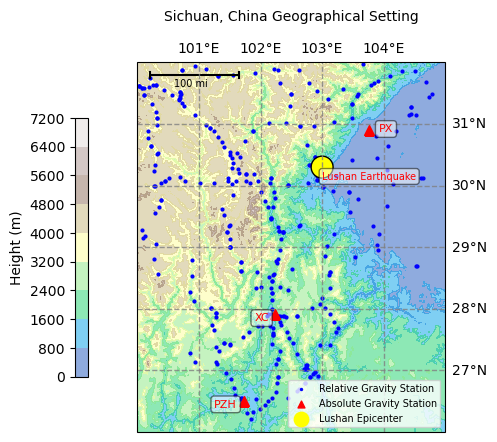

In [10]:
# Make map

# set projection type
proj = ccrs.PlateCarree()

# make figure
plt.figure()
ax = plt.axes(projection=proj)
ax.set_title('Sichuan, China Geographical Setting', fontsize=10, pad=15)

# set extent boundaries
extent = [100, 105, 26, 32]
ax.set_extent(extent)

# add topography
y = ds.lat.values
x = ds.lon.values
z = ds.z.values

contour = ax.contourf(x, y, z, cmap='terrain', alpha=0.5, transform=proj)
plt.colorbar(contour, ax=ax, label='Height (m)', orientation='vertical', pad=.1, shrink=0.7, location='left')

# make latitude and longitude gridlines
grid = ax.gridlines(draw_labels=True, linewidth=1, color='gray', alpha=0.8, linestyle='--')
grid.left_labels = False
grid.bottom_labels = False

# add data points from dfs
ax.scatter(df['long'], df['lat'], color="b", marker='o', s=4, transform=proj, label="Relative Gravity Station")
ax.scatter(stations_df['long'], stations_df['lat'], color='red', marker='^', s=50, transform=proj, label="Absolute Gravity Station")
ax.scatter(103.0, 30.3, color='yellow', marker='o', s=220, label="Lushan Epicenter")
ax.scatter(103.0, 30.3, color='black', marker='o', s=250, facecolors='none')

# add labels
ax.text(103, 30.1, "Lushan Earthquake", fontsize=7, c="r", bbox=dict(facecolor='white', edgecolor='black', boxstyle='round', alpha=.5))
ax.text(103.92, 30.87, "PX", fontsize=8, c="r", bbox=dict(facecolor='white', edgecolor='black', boxstyle='round', alpha=.5))
ax.text(101.9, 27.8, "XC", fontsize=8, c="r", bbox=dict(facecolor='white', edgecolor='black', boxstyle='round', alpha=.5))
ax.text(101.25, 26.4, "PZH", fontsize=8, c="r", bbox=dict(facecolor='white', edgecolor='black', boxstyle='round', alpha=.5))

# add scale bar
ax.plot([100.2, 101.65], [31.8, 31.8], color='k', transform=proj)
ax.plot([100.2, 100.2], [31.75, 31.85], color='k', transform=proj)
ax.plot([101.65, 101.65], [31.75, 31.85], color='k', transform=proj)
ax.text(100.6, 31.6, "100 mi", fontsize=7)

# add legend
plt.legend(loc="lower right", fontsize="x-small", markerscale=.7)
plt.savefig("lushan_map")
plt.show()